In [194]:
#Importing librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [94]:
pop_den=pd.read_csv('afg_place4_admin1_population_density.csv')
clim_obs1=pd.read_csv('afg_place4_admin1_climate_obs.csv')

In [3]:
#Transformations

In [4]:
# Define a function to convert people per square kilometer to people per square mile
def km_to_mile(TotalPop):
    return TotalPop / 2.58999

In [7]:
# Define a function to convert people per square kilometer to people per square mile
def km_to_mile(TotalLA):
    return TotalLA / 2.58999


In [8]:
# Apply the function to the "density" column
pop_den['NewTotalPop'] = pop_den['TotalPop'].apply(km_to_mile)
# Apply the function to the "density" column
pop_den['NewTotalLA'] = pop_den['TotalLA'].apply(km_to_mile)

In [9]:
# Save the updated DataFrame to a new CSV file
pop_den.to_csv('afg_place4_admin1_population_density_miles.csv', index=False)

In [10]:
#Interpolations

In [11]:
# Fill missing values using linear interpolation
pop_den['TotalPop'] = pop_den['TotalPop'].interpolate(method='linear')
pop_den['TotalLA'] = pop_den['TotalLA'].interpolate(method='linear')

In [19]:
pop_den.head()

,OID,AdminID,AdminName,ISO3,UNSD,GeoRegion,GeoSubreg,IncomeGrp,LendCat,ThemeVar,...,PopVarName,PopVarDesc,UrbanPop,RuralPop,TotalPop,UrbanLA,RuralLA,TotalLA,NewTotalPop,NewTotalLA
0,-1,27,Balkh,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2010: 5–10 persons p...",...,"2010 Female Population, Ages 45–49",Female population ages 45–49 in the year 2010,0.000000,0.661143,0.661143,0.000000,5.496848,5.496848,0.255269,2.122343
1,-1,21,Ghor,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,9.828574,6164.509170,6174.337744,11.419186,7119.314048,7130.733234,2383.923391,2753.189485
2,-1,23,Uruzgan,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,0.660943,790.661970,791.322912,0.725551,865.838102,866.563653,305.531262,334.581853
3,-1,25,Paktika,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,0.619041,1532.359497,1532.978538,0.728231,1799.676713,1800.404944,591.885891,695.139728
4,-1,24,Zabul,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,2.312578,3322.963300,3325.275878,2.916575,3959.264387,3962.180962,1283.895257,1529.805506


In [20]:
#pop_den = pop_den.drop(['AdminType'], axis=1)
#pop_den = pop_den.drop(['Adm1Name'], axis=1)
#pop_den = pop_den.drop(['Adm0Name'], axis=1)

In [21]:
# Calculate the IQR for each column
Q1 = pop_den.quantile(0.25)
Q3 = pop_den.quantile(0.75)
IQR = Q3 - Q1
IQR

OID                0.000000
AdminID           16.000000
UNSD               0.000000
ThemeID            2.000000
VarID              3.000000
PopVarID          31.500000
UrbanPop         306.298692
RuralPop       23468.551623
TotalPop       25202.271198
UrbanLA           24.189746
RuralLA         4968.317183
TotalLA         4994.158112
NewTotalPop     9730.644210
NewTotalLA      1928.253820
dtype: float64

In [22]:
# Find the outliers for each column
outliers = ((pop_den < (Q1 - 1.5 * IQR)) | (pop_den > (Q3 + 1.5 * IQR))).any(axis=1)

In [23]:
# Find the outliers for each column
outliers = ((pop_den < (Q1 - 1.5 * IQR)) | (pop_den > (Q3 + 1.5 * IQR))).any(axis=1)
pop_den = pop_den[~outliers]
pop_den.head()

,OID,AdminID,AdminName,ISO3,UNSD,GeoRegion,GeoSubreg,IncomeGrp,LendCat,ThemeVar,...,PopVarName,PopVarDesc,UrbanPop,RuralPop,TotalPop,UrbanLA,RuralLA,TotalLA,NewTotalPop,NewTotalLA
0,-1,27,Balkh,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2010: 5–10 persons p...",...,"2010 Female Population, Ages 45–49",Female population ages 45–49 in the year 2010,0.000000,0.661143,0.661143,0.000000,5.496848,5.496848,0.255269,2.122343
1,-1,21,Ghor,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,9.828574,6164.509170,6174.337744,11.419186,7119.314048,7130.733234,2383.923391,2753.189485
2,-1,23,Uruzgan,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,0.660943,790.661970,791.322912,0.725551,865.838102,866.563653,305.531262,334.581853
3,-1,25,Paktika,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,0.619041,1532.359497,1532.978538,0.728231,1799.676713,1800.404944,591.885891,695.139728
4,-1,24,Zabul,AFG,4,Asia,Southern Asia,Low income,IDA,"POPULATION DENSITY ZONES, 2005: 10–15 persons ...",...,"2010 Female Population, Ages 10–14",Female population ages 10–14 in the year 2010,2.312578,3322.963300,3325.275878,2.916575,3959.264387,3962.180962,1283.895257,1529.805506


In [24]:
pop_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33682 entries, 0 to 49919
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OID          33682 non-null  int64  
 1   AdminID      33682 non-null  int64  
 2   AdminName    33682 non-null  object 
 3   ISO3         33682 non-null  object 
 4   UNSD         33682 non-null  int64  
 5   GeoRegion    33682 non-null  object 
 6   GeoSubreg    33682 non-null  object 
 7   IncomeGrp    33682 non-null  object 
 8   LendCat      33682 non-null  object 
 9   ThemeVar     33682 non-null  object 
 10  ThemeID      33682 non-null  int64  
 11  ThemeCode    33682 non-null  object 
 12  ThemeName    33682 non-null  object 
 13  ThemeDesc    33682 non-null  object 
 14  VarID        33682 non-null  int64  
 15  VarName      33682 non-null  object 
 16  VarDesc      33682 non-null  object 
 17  PopVarID     33682 non-null  int64  
 18  PopVarName   33682 non-null  object 
 19  PopV

In [25]:
interpolate= pop_den['NewTotalPop'].interpolate(method='linear', inplace=True)
smooth = pop_den['variable_smooth'] = pop_den['NewTotalPop'].rolling(window=3, center=True).mean()

In [26]:
#Removing rows with missing values:
pop_den.dropna(inplace=True)
pop_den.describe()

In [27]:
pop_den.describe()

,OID,AdminID,UNSD,ThemeID,VarID,PopVarID,UrbanPop,RuralPop,TotalPop,UrbanLA,RuralLA,TotalLA,NewTotalPop,NewTotalLA,variable_smooth
count,33680.0,33680.000000,33680.0,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000,33680.000000
mean,-1.0,26.341182,4.0,23.001277,5.894893,32.786609,61.508670,6777.158181,6838.666851,9.836243,2555.406666,2565.242909,2640.422106,990.445102,2640.392895
std,0.0,9.524589,0.0,1.409049,1.837079,16.859970,126.810752,11135.351133,11193.017786,12.588817,3126.581302,3130.062579,4321.645175,1208.523036,2961.814757
min,-1.0,9.000000,4.0,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120998,0.000000,0.046718,0.001958
25%,-1.0,18.000000,4.0,22.000000,5.000000,18.000000,0.000000,282.606574,295.831205,0.000000,104.519339,109.102952,114.220984,42.124855,539.494228
50%,-1.0,27.000000,4.0,23.000000,6.000000,34.000000,6.575591,1994.474468,2030.079323,4.226547,1305.514284,1318.026442,783.817437,508.892483,1463.782795
75%,-1.0,34.000000,4.0,24.000000,7.000000,47.000000,54.036905,7496.863486,7594.332597,15.094510,3873.652051,3927.392544,2932.186069,1516.373632,3791.412789
max,-1.0,42.000000,4.0,25.000000,11.000000,64.000000,766.157351,59307.931380,59904.250629,57.021626,12574.457047,12579.557325,23129.143599,4856.990693,20333.496420


<AxesSubplot:>

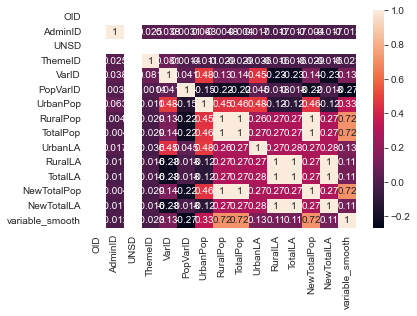

In [28]:
import seaborn as sns

sns.heatmap(pop_den.corr(), annot=True)

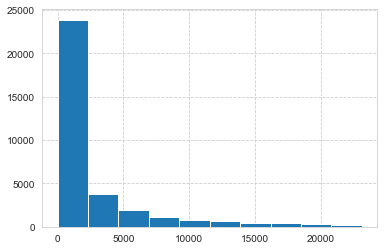

In [29]:
import matplotlib.pyplot as plt

plt.hist(pop_den['NewTotalPop'], bins=10)
plt.show()


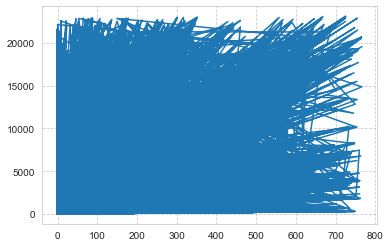

In [36]:
plt.plot(pop_den['UrbanPop'], pop_den['NewTotalPop'])
plt.show()


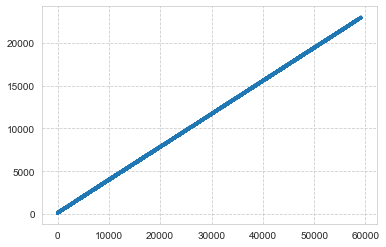

In [37]:
plt.plot(pop_den['RuralPop'], pop_den['NewTotalPop'])
plt.show()

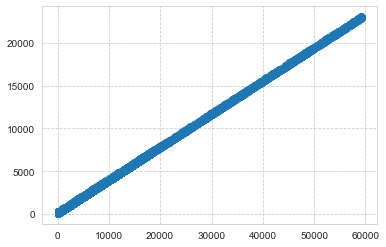

In [38]:
plt.scatter(pop_den['RuralPop'], pop_den['NewTotalPop'])
plt.show()


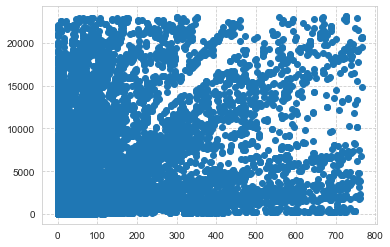

In [39]:
plt.scatter(pop_den['UrbanPop'], pop_den['NewTotalPop'])
plt.show()

In [43]:
pop_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33680 entries, 1 to 49914
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OID              33680 non-null  int64 
 1   AdminID          33680 non-null  int64 
 2   AdminName        33680 non-null  object
 3   ISO3             33680 non-null  object
 4   UNSD             33680 non-null  int64 
 5   GeoRegion        33680 non-null  object
 6   GeoSubreg        33680 non-null  object
 7   IncomeGrp        33680 non-null  object
 8   LendCat          33680 non-null  object
 9   ThemeVar         33680 non-null  object
 10  ThemeID          33680 non-null  int64 
 11  ThemeCode        33680 non-null  object
 12  ThemeName        33680 non-null  object
 13  ThemeDesc        33680 non-null  object
 14  VarID            33680 non-null  int64 
 15  VarName          33680 non-null  object
 16  VarDesc          33680 non-null  object
 17  PopVarID         33680 non-null

In [46]:
# Get the unique values of a specific column
unique_vals = pop_den['ThemeID'].unique()
unique_vals

array([22, 24, 25, 23, 21], dtype=int64)

In [41]:
float_cols = pop_den.select_dtypes(include='float64').columns

In [42]:
float_cols = pop_den.select_dtypes(include='float64').columns
pop_den[float_cols] = pop_den[float_cols].astype('int64')

In [192]:
X=pop_den[['OID' ,'PopVarID', 'variable_smooth','NewTotalLA','RuralLA','UrbanLA','RuralPop','UrbanPop']]
y=pop_den['NewTotalPop']

KeyError: "['variable_smooth', 'NewTotalLA'] not in index"

In [193]:
y_norm = np.log1p(y)

<AxesSubplot:>

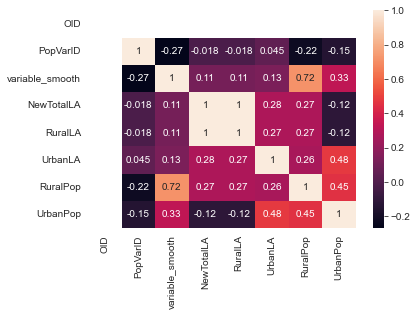

In [50]:
import seaborn as sns

sns.heatmap(X.corr(), annot=True)

In [51]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:

from sklearn.cluster import KMeans
wcss=[]

In [53]:
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

In [54]:
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=0)

In [55]:
kmeans.fit(X_scaled)
wcss.append(kmeans.inertia_)

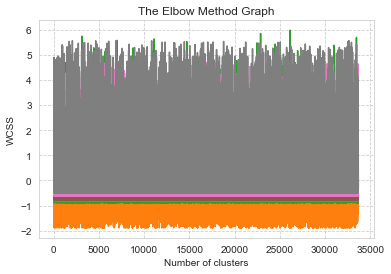

In [56]:
plt.plot(X_scaled)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
# choose the number of clusters
n_clusters = 3

In [58]:

from sklearn.cluster import KMeans
# run the K-means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [59]:

# analyze the results
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

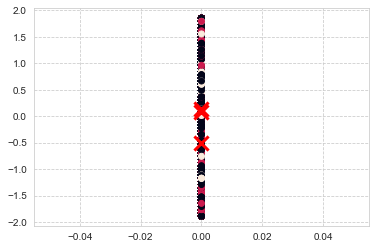

In [60]:

# create scatter plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)

# add markers for centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')

# show plot
plt.show()

In [61]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=20, random_state=42)

In [62]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [63]:

lm= LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
mean_squared_error(y_test, y_pred)

0.11076403469435461

In [64]:
lm.score(X_scaled, y, sample_weight= None)

0.9999999943335751

In [65]:

mean_squared_error(y_test, y_pred)

0.11076403469435461

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

In [67]:

# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [68]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [77]:

# Create a Ridge regression object
ridge_reg = Ridge(alpha=1.0)


In [78]:

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)


Ridge()

In [79]:

# Predict the target variable for the testing data
y_pred = ridge_reg.predict(X_test)

In [81]:

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  0.1252914322986835
R-squared score:  0.9999999952669351


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [83]:

# Create a Lasso regression object
lasso_reg = Lasso(alpha=1.0)
# Fit the model to the training data
lasso_reg.fit(X_train, y_train)
# Predict the target variable for the testing data
y_pred = lasso_reg.predict(X_test)


In [84]:

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  1.5419022906306328
R-squared score:  0.9999999417524128


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [86]:

# Create a Decision Tree regression object
dt_reg = DecisionTreeRegressor()
# Fit the model to the training data
dt_reg.fit(X_train, y_train)
# Predict the target variable for the testing data
y_pred = dt_reg.predict(X_test)

In [87]:

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  124.15
R-squared score:  0.9999953100543453


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [89]:

# Create a Random Forest regression object
rf_reg = RandomForestRegressor()

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf_reg.predict(X_test)


In [90]:

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  64.10167999999739
R-squared score:  0.9999975784664069


In [91]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [92]:

# Create the ElasticNet regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [93]:

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  121500.29542812491
R-squared score:  0.9954101507644691


In [99]:
clim_obs=pd.read_csv('afg_place4_admin1_climate_obs.csv')

In [111]:
# Define a function to convert people per square kilometer to people per square mile
def km_to_mile(TotalPop):
    return TotalPop / 2.58999

In [112]:
# Define a function to convert people per square kilometer to people per square mile
def km_to_mile(TotalLA):
    return TotalLA / 2.58999

In [114]:
# Apply the function to the "density" column
clim_obs['NewTotalPop'] = clim_obs['TotalPop'].apply(km_to_mile)
# Apply the function to the "density" column
clim_obs['NewTotalLA'] = clim_obs['TotalLA'].apply(km_to_mile)

In [113]:
# Apply the function to the "density" column
clim_obs['TotalPop'] = clim_obs['UrbanPop'] + clim_obs['RuralPop']

In [115]:
# Calculate the IQR for each column
Q1 = clim_obs.quantile(0.25)
Q3 = clim_obs.quantile(0.75)
IQR = Q3 - Q1
IQR

OID               0.000000
AdminID          18.000000
UNSD              0.000000
ThemeID           0.000000
VarID            21.000000
PopVarID         27.000000
UrbanPop          5.749912
RuralPop       2404.384025
TotalPop       2406.298891
UrbanLA           4.261548
RuralLA        1708.200687
TotalLA        1708.200687
NewTotalPop     929.076518
NewTotalLA      659.539491
dtype: float64

In [116]:
# Find the outliers for each column
outliers = ((clim_obs < (Q1 - 1.5 * IQR)) | (clim_obs > (Q3 + 1.5 * IQR))).any(axis=1)
clim_obs = clim_obs[~outliers]
clim_obs.head()

,OID,AdminID,AdminType,AdminName,Adm0Name,Adm1Name,ISO3,UNSD,GeoRegion,GeoSubreg,...,PopVarName,PopVarDesc,UrbanPop,RuralPop,TotalPop,UrbanLA,RuralLA,TotalLA,NewTotalPop,NewTotalLA
5,-1,19,admin1,Sari Pul,Afghanistan,Sari Pul,AFG,4,Asia,Southern Asia,...,"2010 Female Population, Ages 45–49",Female population ages 45–49 in the year 2010,0.000000,8.487384,8.487384,0.000000,40.601736,40.601736,3.276995,15.676407
6,-1,18,admin1,Samangan,Afghanistan,Samangan,AFG,4,Asia,Southern Asia,...,"2010 Female Population, Ages 45–49",Female population ages 45–49 in the year 2010,6.879759,1021.002238,1027.881997,10.416117,1806.582652,1816.998769,396.867168,701.546635
7,-1,17,admin1,Kunduz,Afghanistan,Kunduz,AFG,4,Asia,Southern Asia,...,"2010 Female Population, Ages 45–49",Female population ages 45–49 in the year 2010,0.000000,594.568651,594.568651,0.000000,294.321084,294.321084,229.564072,113.637923
13,-1,9,admin1,Kabul,Afghanistan,Kabul,AFG,4,Asia,Southern Asia,...,"2010 Male Population, Ages 50–54",Male population ages 50–54 in the year 2010,2.169954,283.298741,285.468695,4.261548,579.373756,583.635303,110.219999,225.342686
18,-1,18,admin1,Samangan,Afghanistan,Samangan,AFG,4,Asia,Southern Asia,...,"2010 Male Population, Ages 30-34",Male population ages 30-34 in the year 2010,13.319607,1989.403073,2002.722681,10.416117,1806.582652,1816.998769,773.254986,701.546635


In [118]:
interpolate= clim_obs['NewTotalLA'].interpolate(method='linear', inplace=True)
smooth = clim_obs['variable_smooth'] = clim_obs['NewTotalLA'].rolling(window=3, center=True).mean()

In [119]:
#Removing rows with missing values:
clim_obs.dropna(inplace=True)
clim_obs.describe()

,OID,AdminID,UNSD,ThemeID,VarID,PopVarID,UrbanPop,RuralPop,TotalPop,UrbanLA,RuralLA,TotalLA,NewTotalPop,NewTotalLA,variable_smooth
count,1961.0,1961.000000,1961.0,1961.0,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000
mean,-1.0,26.297297,4.0,18.0,14.541560,34.063233,1.645180,1097.357091,1099.002271,1.469620,898.409845,899.879465,424.326839,347.445150,347.539491
std,0.0,10.157928,0.0,0.0,9.544762,15.524013,3.005489,1322.151375,1323.027344,2.323045,924.878534,925.635081,510.823341,357.389442,222.512115
min,-1.0,9.000000,4.0,18.0,2.000000,1.000000,0.000000,2.322635,2.322635,0.000000,4.252623,4.252623,0.896774,1.641946,7.424405
25%,-1.0,16.000000,4.0,18.0,4.000000,20.000000,0.000000,197.600694,197.600694,0.000000,150.502119,150.502119,76.293999,58.109151,191.155934
50%,-1.0,27.000000,4.0,18.0,11.000000,36.000000,0.000000,577.665537,578.432957,0.000000,648.546805,653.562263,223.334050,252.341616,284.168898
75%,-1.0,37.000000,4.0,18.0,25.000000,47.000000,2.008370,1484.794276,1493.639565,2.159798,1275.363005,1276.802898,576.697040,492.975995,470.827602
max,-1.0,42.000000,4.0,18.0,26.000000,64.000000,14.349589,6263.184563,6263.184563,10.416117,3928.919802,3931.079600,2418.227315,1517.797212,1140.523957


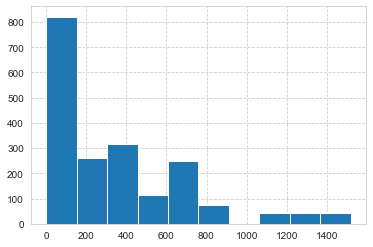

In [120]:

import matplotlib.pyplot as plt

plt.hist(clim_obs['NewTotalLA'], bins=10)
plt.show()

<AxesSubplot:>

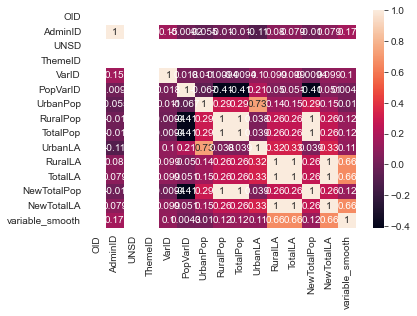

In [121]:

import seaborn as sns

sns.heatmap(clim_obs.corr(), annot=True)

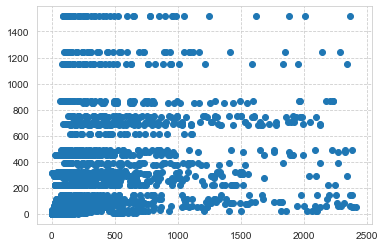

In [197]:
plt.scatter(clim_obs['NewTotalPop'], clim_obs['NewTotalLA'])
plt.show()


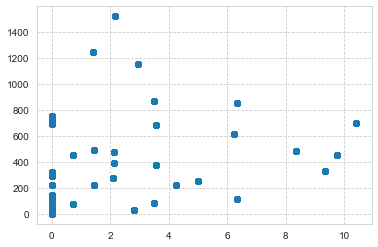

In [123]:
plt.scatter(clim_obs['UrbanLA'], clim_obs['NewTotalLA'])
plt.show()


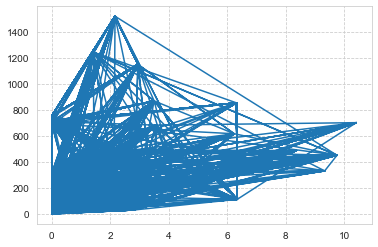

In [124]:
plt.plot(clim_obs['UrbanLA'], clim_obs['NewTotalLA'])
plt.show()

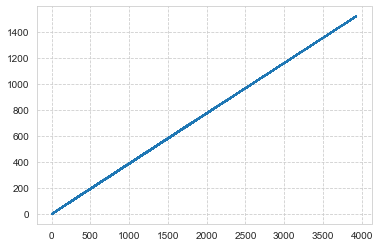

In [125]:
plt.plot(clim_obs['RuralLA'], clim_obs['NewTotalLA'])
plt.show()

In [128]:
clim_obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 6 to 8245
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OID              1961 non-null   int64 
 1   AdminID          1961 non-null   int64 
 2   AdminType        1961 non-null   object
 3   AdminName        1961 non-null   object
 4   Adm0Name         1961 non-null   object
 5   Adm1Name         1961 non-null   object
 6   ISO3             1961 non-null   object
 7   UNSD             1961 non-null   int64 
 8   GeoRegion        1961 non-null   object
 9   GeoSubreg        1961 non-null   object
 10  IncomeGrp        1961 non-null   object
 11  LendCat          1961 non-null   object
 12  ThemeVar         1961 non-null   object
 13  ThemeID          1961 non-null   int64 
 14  ThemeCode        1961 non-null   object
 15  ThemeName        1961 non-null   object
 16  ThemeDesc        1961 non-null   object
 17  VarID            1961 non-null   

In [127]:
float_cols = clim_obs.select_dtypes(include='float64').columns
clim_obs[float_cols] = clim_obs[float_cols].astype('int64')

In [154]:
X=clim_obs[['OID' ,'PopVarID', 'variable_smooth','RuralLA','UrbanLA','RuralPop','UrbanPop']]
y=clim_obs['NewTotalLA']

<AxesSubplot:>

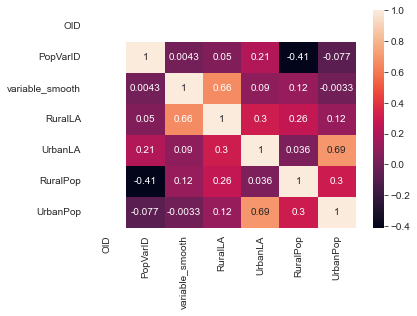

In [156]:
import seaborn as sns

sns.heatmap(X.corr(), annot=True)

In [157]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import KMeans
wcss=[]

In [158]:
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

In [159]:
kmeans.fit(X_scaled)
wcss.append(kmeans.inertia_)

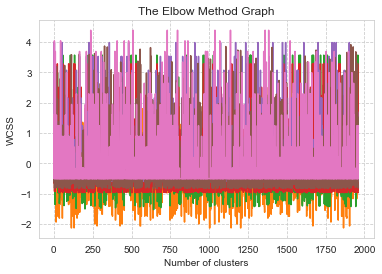

In [160]:
plt.plot(X_scaled)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [161]:
# choose the number of clusters
n_clusters = 3



In [162]:
from sklearn.cluster import KMeans
# run the K-means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [163]:
# analyze the results
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


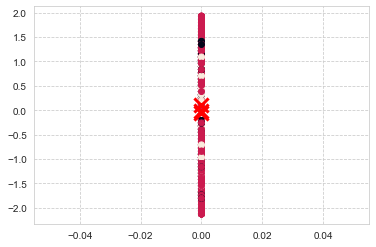

In [164]:
# create scatter plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)

# add markers for centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')

# show plot
plt.show()

In [165]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=20, random_state=42)


In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [167]:
lm= LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0734002557798386

In [169]:
lm.score(X_scaled, y, sample_weight= None)


0.9999994303766572

In [170]:
mean_squared_error(y_test, y_pred)

0.0734002557798386

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [172]:

# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [173]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd




In [175]:
# Create a Ridge regression object
ridge_reg = Ridge(alpha=1.0)


In [176]:
# Fit the model to the training data
ridge_reg.fit(X_train, y_train)


Ridge()

In [177]:
# Predict the target variable for the testing data
y_pred = ridge_reg.predict(X_test)


In [178]:
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  0.21212644688903612
R-squared score:  0.9999981082157687


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd



In [180]:
# Create a Lasso regression object
lasso_reg = Lasso(alpha=1.0)


In [181]:
# Fit the model to the training data
lasso_reg.fit(X_train, y_train)
# Predict the target variable for the testing data
y_pred = lasso_reg.predict(X_test)


In [182]:
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  1.383887892860091
R-squared score:  0.9999876582230462


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd





In [184]:
# Create a Random Forest regression object
rf_reg = RandomForestRegressor()


In [185]:
# Fit the model to the training data
rf_reg.fit(X_train, y_train)


RandomForestRegressor()

In [186]:
# Predict the target variable for the testing data
y_pred = rf_reg.predict(X_test)


In [187]:
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  0.0
R-squared score:  1.0


In [188]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [189]:
# Create the ElasticNet regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)


ElasticNet(alpha=0.1)

In [190]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [191]:
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  678.0823938675456
R-squared score:  0.9939527315004826


In [195]:
adjustedr2 = 1-r2

In [196]:
adjustedr2

0.006047268499517422